In [18]:
import pandas as pd
import numpy as np
import mysql.connector
import config

import statsmodels.api as sm
from statsmodels.formula.api import ols

import seaborn as sns
import matplotlib.pyplot as plt
%matploblib inline

UsageError: Line magic function `%matploblib` not found.


In [2]:
df = pd.read_csv('include_global.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,...,accountability,rule_of_law,co2_mmt_capita,co2_kg_capita,GDP_Ag_and_Forest,petro_income,resource_income,co2_dollar,co2_kg_dollar,KOFGI
0,0,0,Afghanistan,5.963890e+10,34600200.0,16,172,10,8.54149,1723.66,...,-1.039840,-1.498190,2.468624e-07,0.000247,21.08110,0.000824,0.62586,1.432201e-10,0.143220,38.658775
1,1,1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,...,0.169949,-0.328867,1.442101e-06,0.001442,19.85000,0.853421,1.04950,1.367142e-10,0.136714,67.185555
2,2,2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,...,-0.863169,-0.857401,3.419863e-06,0.003420,12.21280,10.046100,12.30340,2.505726e-10,0.250573,53.182339
3,3,3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,...,-1.142930,-1.087320,7.422824e-07,0.000742,9.83117,10.168700,10.74620,1.211280e-10,0.121128,41.751495
4,4,4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,...,0.492563,-0.393606,4.421624e-06,0.004422,6.26457,0.552452,1.13494,2.427840e-10,0.242784,63.024387


In [5]:
# df = df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)

In [6]:
df.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income', 'co2_dollar',
       'co2_kg_dollar', 'KOFGI'],
      dtype='object')

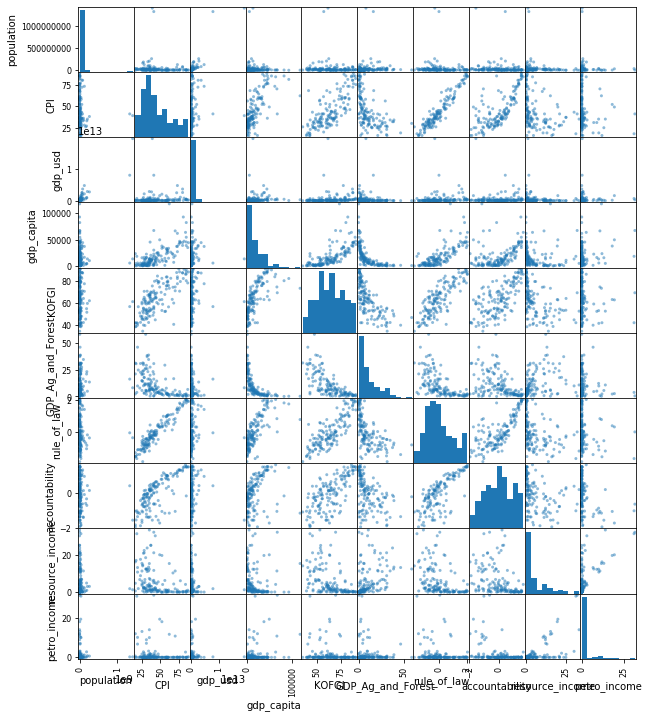

In [8]:
x_cols = ['population', 'CPI', 'gdp_usd', 'gdp_capita', 'KOFGI', 'GDP_Ag_and_Forest',
         'rule_of_law', 'accountability', 'resource_income','petro_income']

pd.plotting.scatter_matrix(df[x_cols], figsize=(10,12));




In [9]:
df[x_cols].corr()

,population,CPI,gdp_usd,gdp_capita,KOFGI,GDP_Ag_and_Forest,rule_of_law,accountability,resource_income,petro_income
population,1.000000,-0.068175,0.894543,-0.084696,-0.055843,0.037576,-0.053634,-0.094767,-0.094871,-0.046986
CPI,-0.068175,1.000000,0.069647,0.712472,0.767593,-0.551452,0.952851,0.739450,-0.377705,-0.147170
gdp_usd,0.894543,0.069647,1.000000,0.061225,0.101670,-0.102309,0.078321,-0.031908,-0.125866,-0.020708
gdp_capita,-0.084696,0.712472,0.061225,1.000000,0.675556,-0.603600,0.731509,0.377054,-0.140267,0.264522
KOFGI,-0.055843,0.767593,0.101670,0.675556,1.000000,-0.695455,0.822679,0.687101,-0.477679,-0.143553
GDP_Ag_and_Forest,0.037576,-0.551452,-0.102309,-0.603600,-0.695455,1.000000,-0.585021,-0.427808,0.342043,-0.143292
rule_of_law,-0.053634,0.952851,0.078321,0.731509,0.822679,-0.585021,1.000000,0.749209,-0.410376,-0.158322
accountability,-0.094767,0.739450,-0.031908,0.377054,0.687101,-0.427808,0.749209,1.000000,-0.380317,-0.337268
resource_income,-0.094871,-0.377705,-0.125866,-0.140267,-0.477679,0.342043,-0.410376,-0.380317,1.000000,0.602720
petro_income,-0.046986,-0.147170,-0.020708,0.264522,-0.143553,-0.143292,-0.158322,-0.337268,0.602720,1.000000


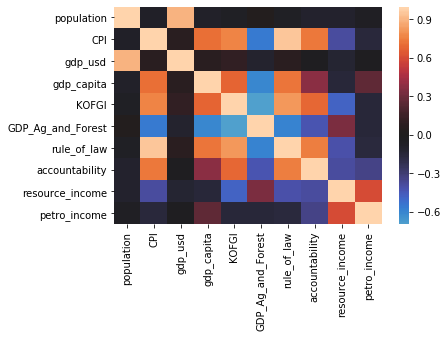

In [10]:
sns.heatmap(df[x_cols].corr(), center=0);

In [11]:
# let's log things to help normality
df['GDP_Ag_and_Forest_LOG'] = np.log(df['GDP_Ag_and_Forest'] + 1)
df['resource_income_LOG'] = np.log(df['resource_income'] + 1)
df['CPI_LOG'] = np.log(df['CPI'] + 1)

In [13]:
# scale from mean
scaled_GDP_Ag_and_Forest_LOG = (df['GDP_Ag_and_Forest_LOG']-np.mean(df['GDP_Ag_and_Forest_LOG']))/np.sqrt(np.var(df['GDP_Ag_and_Forest_LOG']))
scaled_resource_income_LOG = (df['resource_income_LOG']-np.mean(df['resource_income_LOG']))/np.sqrt(np.var(df['resource_income_LOG']))
df["scaled_GDP_Ag_and_Forest_LOG"]= scaled_GDP_Ag_and_Forest_LOG
df["scaled_resource_income_LOG"]= scaled_resource_income_LOG



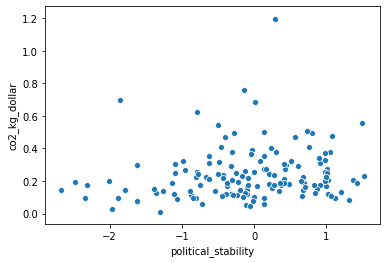

In [14]:
sns.scatterplot(x=df['political_stability'], y=df['co2_kg_dollar'])

In [15]:
df_final = df[['political_stability', 'accountability', 'rule_of_law', 'co2_kg_dollar', 'scaled_GDP_Ag_and_Forest_LOG', 'scaled_resource_income_LOG']]

###  dataset segmented.
## Assemble model

In [19]:
outcome = 'co2_kg_dollar'
predictors = df_final.drop('co2_kg_dollar', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [20]:
outcome = 'co2_kg_dollar'
predictors = df_final.drop('co2_kg_dollar', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_kg_dollar   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     6.890
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           9.12e-06
Time:                        16:01:09   Log-Likelihood:                 75.722
No. Observations:                 143   AIC:                            -139.4
Df Residuals:                     137   BIC:                            -121.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2415      0.012     19.598      0.000       0.217       0.266
political_stability              0.0167      0.020      0.814      0.417      -0.024       0.057
accountability                  -0.0291      0.021     -1.388      0.167      -0.071       0.012
rule_of_law                     -0.0347      0.027     -1.293      0.198      -0.088       0.018
scaled_GDP_Ag_and_Forest_LOG    -0.0901      0.018     -4.994      0.000      -0.126      -0.054
scaled_resource_income_LOG       0.0093      0.015      0.615      0.539      -0.021       0.039
==============================================================================
Omnibus:                       78.083   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.862
Skew:                           1.939   Prob(JB):                     8.99e-88
Kurtosis:                      10.227   Cond. No.                         4.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Low R = 0.201. Not great
### significant P on ag_forest scaled log, but not much else

In [21]:
df.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income', 'co2_dollar',
       'co2_kg_dollar', 'KOFGI', 'GDP_Ag_and_Forest_LOG',
       'resource_income_LOG', 'CPI_LOG', 'scaled_GDP_Ag_and_Forest_LOG',
       'scaled_resource_income_LOG'],
      dtype='object')

In [22]:
df_final = df[['political_stability', 'accountability', 'rule_of_law', 'co2_kg_dollar', 
               'scaled_GDP_Ag_and_Forest_LOG', 'scaled_resource_income_LOG', 'KOFGI',
              'CPI_LOG','GI_risk']]

In [23]:
outcome = 'co2_kg_dollar'
predictors = df_final.drop('co2_kg_dollar', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=df_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_kg_dollar   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     5.033
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.78e-05
Time:                        16:03:54   Log-Likelihood:                 78.470
No. Observations:                 143   AIC:                            -138.9
Df Residuals:                     134   BIC:                            -112.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.4163      0.358     -1.163      0.247      -1.124       0.292
political_stability              0.0179      0.021      0.846      0.399      -0.024       0.060
accountability                  -0.0385      0.022     -1.757      0.081      -0.082       0.005
rule_of_law                     -0.0737      0.044     -1.665      0.098      -0.161       0.014
scaled_GDP_Ag_and_Forest_LOG    -0.0752      0.020     -3.739      0.000      -0.115      -0.035
scaled_resource_income_LOG       0.0107      0.016      0.678      0.499      -0.020       0.042
KOFGI                            0.0023      0.002      1.223      0.223      -0.001       0.006
CPI_LOG                          0.1616      0.099      1.629      0.106      -0.035       0.358
GI_risk                         -0.0021      0.002     -1.190      0.236      -0.005       0.001
==============================================================================
Omnibus:                       84.789   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.292
Skew:                           2.113   Prob(JB):                    1.02e-103
Kurtosis:                      10.858   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.head()

,country,gdp_usd,population,CPI,rank,GI_risk,co2_mmt,gdp_capita,regulatory_quality,political_stability,...,petro_income,resource_income,co2_dollar,co2_kg_dollar,KOFGI,GDP_Ag_and_Forest_LOG,resource_income_LOG,CPI_LOG,scaled_GDP_Ag_and_Forest_LOG,scaled_resource_income_LOG
0,Afghanistan,5.963890e+10,34600200.0,16,172,10,8.54149,1723.66,-1.327690,-2.671050,...,0.000824,0.62586,1.432201e-10,0.143220,38.658775,3.094722,0.486037,2.833213,1.082054,-0.818370
1,Albania,3.087580e+10,2927090.0,36,99,35,4.22116,10548.30,0.189022,0.344645,...,0.853421,1.04950,1.367142e-10,0.136714,67.185555,3.037354,0.717596,3.610918,1.022566,-0.601189
2,Algeria,5.536240e+11,40563900.0,35,105,35,138.72300,13648.20,-1.171880,-1.097530,...,10.046100,12.30340,2.505726e-10,0.250573,53.182339,2.581186,2.588020,3.583519,0.549541,1.153091
3,Angola,1.768130e+11,28852900.0,19,165,22,21.41700,6128.08,-1.001380,-0.315899,...,10.168700,10.74620,1.211280e-10,0.121128,41.751495,2.382428,2.463530,2.995732,0.343438,1.036331
4,Argentina,7.994760e+11,43897900.0,40,85,35,194.10000,18212.20,-0.469625,0.204626,...,0.552452,1.13494,2.427840e-10,0.242784,63.024387,1.983009,0.758439,3.713572,-0.070741,-0.562883


In [26]:
df.to_csv('endthurs.csv')

# Custom cleaning method time.

In [ ]:
'''
Issue:
    We're merging a lot of .csvs, which ideally contain the same ~150 countries.
    If the countries are named differently while referring to the same country:
        we lose data on the inner join.
    This is bad
    '''

In [ ]:
''' Solution:
entry in main = substring
if substring occurs within string entry in other:
    set other = substring
    
so we can clean using a lambda on the dataframe before merging.
test below:
    calling len(main.merge(other,on='string',how='inner')) should return 3.
'''

In [56]:
main.head()

,string
0,meow
1,berry
2,Democratic Republic of the Congo


In [57]:
other.head()

,string
0,meowmix
1,strawberry
2,Congo (Democratic Republic of the)


In [59]:
fuzz.ratio(main.iloc[2]['string'],other.iloc[2]['string'])
# now we're onto something

79

In [ ]:
def clean_sims(row):
    if row['country'] !=

In [36]:
for a, b in zip(main.string, other.string):
    a = 'frog'
    print(a,b)

frog meowmix
frog strawberry
frog Congo (Democratic Republic of the)


In [41]:
!pip install fuzzywuzzy

In [42]:
import fuzzywuzzy
from fuzzywuzzy import fuzz

/Users/mclev/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [47]:
perf = fuzz.ratio('a','a')
print(perf)

100


In [43]:
similarity = fuzz.ratio('Democratic Republic of the Congo', 'Congo (Democratic Republic of The)')

In [48]:
similarity

76

In [ ]:
a = {'string': ['meow', 'berry', 'Democratic Republic of the Congo']}
main = pd.DataFrame(data=a)
b = {'string': ['meowmix', 'strawberry', 'Congo (Democratic Republic of the)', ]}
other = pd.DataFrame(data=b)

In [65]:
main.head()

,string
0,meow
1,berry
2,Democratic Republic of the Congo


In [66]:
other.head()

,string
0,meowmix
1,strawberry
2,Congo (Democratic Republic of the)


In [88]:
other.loc[other.string=='strawberry'].index[0] # gets index of known value in column, super cool

1

In [89]:
other.iloc[1]['string']

'strawberry'

In [92]:
def cleaner(main, other, column, threshold):
    t = threshold # int between 0 and 100, for fuzz. try .7 to start
    print(f'threshold: {t}')
    for m_row in main[column]: # loop through the series of relevant columns
        for o_row in other[column]: # loop through other entirely for each row in main
            sim = fuzz.ratio(m_row, o_row)
            print(f'{m_row} and {o_row} sim: {sim}')
            if sim > t: # might have to readjust this as we test
                print(f'match__ {o_row} becomes {m_row}')
                ind = other.loc[other[column]==o_row].index[0]
                other.iloc[ind]['string'] = m_row # set value with some index trickery
    return main, other

In [93]:
clean_main, clean_other = cleaner(main, other, 'string', 50)

threshold: 50
meow and meowmix sim: 73
match__ meowmix becomes meow
meow and strawberry sim: 14
meow and Congo (Democratic Republic of the) sim: 16
berry and meow sim: 22
berry and strawberry sim: 67
match__ strawberry becomes berry
berry and Congo (Democratic Republic of the) sim: 10
Democratic Republic of the Congo and meow sim: 11
Democratic Republic of the Congo and berry sim: 11
Democratic Republic of the Congo and Congo (Democratic Republic of the) sim: 79
match__ Congo (Democratic Republic of the) becomes Democratic Republic of the Congo


In [94]:
clean_main.head()

,string
0,meow
1,berry
2,Democratic Republic of the Congo


In [95]:
clean_other.head()

,string
0,meow
1,berry
2,Democratic Republic of the Congo


In [38]:
'''
problem: df['country'] entries are named slightly differently, causing significant data loss
over multiple merges. we merge a lot due to nature of observing ~150 countries as datapoints
plan: nested loops with fuzz. modify other_df to match main_df before the inner merge, on='country'

threshold = v   # define arbitrarily, 0-100. will have to eyeball this trial & error probably. australia & austria, for example

for m_row in main_df:
    for o_row in other_df:
        sim = fuzz.ratio( o_row['country'], m_row['country']  ) # returns value 0-100
        if sim > threshold:
            o_row['country'] = m_row['country'] # change mispelled to correct spelling
# clean?
'''

,string
0,meow
1,berry
2,Democratic Republic of the Congo


In [ ]:
def clean(row):
    

In [29]:
df.columns

Index(['country', 'gdp_usd', 'population', 'CPI', 'rank', 'GI_risk', 'co2_mmt',
       'gdp_capita', 'regulatory_quality', 'political_stability',
       'accountability', 'rule_of_law', 'co2_mmt_capita', 'co2_kg_capita',
       'GDP_Ag_and_Forest', 'petro_income', 'resource_income', 'co2_dollar',
       'co2_kg_dollar', 'KOFGI', 'GDP_Ag_and_Forest_LOG',
       'resource_income_LOG', 'CPI_LOG', 'scaled_GDP_Ag_and_Forest_LOG',
       'scaled_resource_income_LOG'],
      dtype='object')

In [31]:
 
    
for country, gdp in zip(df.country,df.gdp_usd):
    print(country,gdp)

Afghanistan 59638900000.0
Albania 30875800000.0
Algeria 553624000000.0
Angola 176813000000.0
Argentina 799476000000.0
Armenia 23446700000.0
Australia 1088900000000.0
Austria 383118000000.0
Azerbaijan 155209000000.0
Bahrain 61076200000.0
Bangladesh 569985000000.0
Barbados 4731870000.0
Belarus 155762000000.0
Belgium 464710000000.0
Benin 21403300000.0
Bhutan 5877710000.0
Bolivia 71531400000.0
Bosnia and Herzegovina 39560500000.0
Botswana 33933800000.0
Brazil 2870230000000.0
Bulgaria 132051000000.0
Burkina Faso 29994700000.0
Burundi 7130170000.0
Cambodia 53465400000.0
Cameroon 76987300000.0
Central African Republic 2824990000.0
Chad 26306200000.0
Chile 396449000000.0
China 19400000000000.0
Colombia 623204000000.0
Comoros 1149000000.0
Costa Rica 72358900000.0
Croatia 88538700000.0
Cuba 130111000000.0
Cyprus 27741900000.0
Czech Republic 321115000000.0
Denmark 253475000000.0
Djibouti 3037470000.0
Dominica 734646000.0
Dominican Republic 147299000000.0
Ecuador 167902000000.0
El Salvador 4452520

# great, we've finished the cleaner function. let's test it on a merge

In [98]:
en = pd.read_csv('gdp_energy.csv')

In [100]:
en.head()

,country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,11.959208,12.162955,12.260996,13.077806,13.219101,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,13.204362,13.344014,15.302068,13.191836,13.926832,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,GDP per unit of energy use (PPP $ per kg of oi...,EG.GDP.PUSE.KO.PP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# en.isna().sum()

In [109]:
cols_keep = ['country', '2014']
energy = en[cols_keep]
energy = energy.dropna()
len(energy) # this is still more than the main data

171

In [110]:
main = pd.read_csv('endthurs')

In [111]:
len(main)

143

## unclean merge test

In [112]:
unclean = main.merge(energy,on='country',how='inner')
len(unclean)

111

### cuts down to 111 because of naming mismatches. let's try cleaning

In [128]:
main, clean_energy = cleaner(main, energy, 'country', 85) 

threshold: 85
Afghanistan and Angola sim: 35
Afghanistan and Albania sim: 56
Afghanistan and Arab World sim: 19
Afghanistan and United Arab Emirates sim: 19
Afghanistan and Argentina sim: 30
Afghanistan and Armenia sim: 44
Afghanistan and Australia sim: 40
Afghanistan and Austria sim: 44
Afghanistan and Azerbaijan sim: 29
Afghanistan and Belgium sim: 22
Afghanistan and Benin sim: 38
Afghanistan and Bangladesh sim: 29
Afghanistan and Bulgaria sim: 42
Afghanistan and Bahrain sim: 33
Afghanistan and Bosnia and Herzegovina sim: 24
Afghanistan and Belarus sim: 22
Afghanistan and Bolivia sim: 11
Afghanistan and Brazil sim: 24
Afghanistan and Brunei Darussalam sim: 21
Afghanistan and Botswana sim: 32
Afghanistan and Canada sim: 35
Afghanistan and Central Europe and the Baltics sim: 20
Afghanistan and Switzerland sim: 18
Afghanistan and Chile sim: 25
Afghanistan and China sim: 25
Afghanistan and Cote d'Ivoire sim: 8
Afghanistan and Cameroon sim: 21
Afghanistan and Congo, Dem. Rep. sim: 7
Afgha

/Users/mclev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':



Austria and Estonia sim: 57
Austria and Ethiopia sim: 40
Austria and European Union sim: 29
Austria and Finland sim: 29
Austria and France sim: 31
Austria and Gabon sim: 17
Austria and United Kingdom sim: 19
Austria and Georgia sim: 43
Austria and Ghana sim: 17
Austria and Greece sim: 15
Austria and Guatemala sim: 38
Austria and High income sim: 11
Austria and Hong Kong SAR, China sim: 22
Austria and Honduras sim: 27
Austria and Croatia sim: 43
Austria and Haiti sim: 33
Austria and Hungary sim: 29
Austria and IBRD only sim: 0
Austria and IDA & IBRD total sim: 26
Austria and IDA total sim: 38
Austria and IDA blend sim: 12
Austria and Indonesia sim: 38
Austria and IDA only sim: 13
Austria and India sim: 33
Austria and Ireland sim: 29
Austria and Iran, Islamic Rep. sim: 16
Austria and Iraq sim: 36
Austria and Iceland sim: 14
Austria and Israel sim: 46
Austria and Italy sim: 33
Austria and Jamaica sim: 29
Austria and Jordan sim: 31
Austria and Japan sim: 17
Austria and Kazakhstan sim: 35


Brazil and Greece sim: 17
Brazil and Guatemala sim: 27
Brazil and High income sim: 12
Brazil and Hong Kong SAR, China sim: 8
Brazil and Honduras sim: 29
Brazil and Croatia sim: 46
Brazil and Haiti sim: 36
Brazil and Hungary sim: 15
Brazil and IBRD only sim: 27
Brazil and IDA & IBRD total sim: 27
Brazil and IDA total sim: 27
Brazil and IDA blend sim: 13
Brazil and Indonesia sim: 13
Brazil and IDA only sim: 14
Brazil and India sim: 18
Brazil and Ireland sim: 31
Brazil and Iran, Islamic Rep. sim: 25
Brazil and Iraq sim: 40
Brazil and Iceland sim: 15
Brazil and Israel sim: 50
Brazil and Italy sim: 36
Brazil and Jamaica sim: 31
Brazil and Jordan sim: 33
Brazil and Japan sim: 18
Brazil and Kazakhstan sim: 25
Brazil and Kenya sim: 18
Brazil and Kyrgyz Republic sim: 29
Brazil and Cambodia sim: 29
Brazil and Korea, Rep. sim: 24
Brazil and Kuwait sim: 33
Brazil and Latin America & Caribbean (excluding high income) sim: 15
Brazil and Lebanon sim: 15
Brazil and Libya sim: 18
Brazil and Latin Ameri

Croatia and Mexico sim: 15
Croatia and Middle income sim: 10
Croatia and North Macedonia sim: 36
Croatia and Malta sim: 50
Croatia and Myanmar sim: 14
Croatia and Middle East & North Africa (excluding high income) sim: 7
Croatia and Montenegro sim: 24
Croatia and Mongolia sim: 40
Croatia and Mozambique sim: 35
Croatia and Mauritius sim: 38
Croatia and Malaysia sim: 40
Croatia and North America sim: 20
Croatia and Namibia sim: 43
Croatia and Niger sim: 17
Croatia and Nigeria sim: 43
Croatia and Nicaragua sim: 38
Croatia and Netherlands sim: 22
Croatia and Norway sim: 31
Croatia and Nepal sim: 17
Croatia and New Zealand sim: 22
Croatia and OECD members sim: 21
Croatia and Oman sim: 18
Croatia and Pakistan sim: 40
Croatia and Panama sim: 31
Croatia and Peru sim: 18
Croatia and Philippines sim: 11
Croatia and Poland sim: 31
Croatia and Pre-demographic dividend sim: 26
Croatia and Portugal sim: 27
Croatia and Paraguay sim: 40
Croatia and Post-demographic dividend sim: 19
Croatia and Qatar s

Finland and Finland sim: 100
Finland and France sim: 46
Finland and Gabon sim: 17
Finland and United Kingdom sim: 29
Finland and Georgia sim: 29
Finland and Ghana sim: 33
Finland and Greece sim: 0
Finland and Guatemala sim: 25
Finland and High income sim: 22
Finland and Hong Kong SAR, China sim: 22
Finland and Honduras sim: 27
Finland and Croatia sim: 29
Finland and Haiti sim: 17
Finland and Hungary sim: 29
Finland and IBRD only sim: 25
Finland and IDA & IBRD total sim: 9
Finland and IDA total sim: 12
Finland and IDA blend sim: 38
Finland and Indonesia sim: 25
Finland and IDA only sim: 27
Finland and India sim: 33
Finland and Ireland sim: 57
Finland and Iran, Islamic Rep. sim: 24
Finland and Iraq sim: 18
Finland and Iceland sim: 57
Finland and Israel sim: 15
Finland and Italy sim: 17
Finland and Jamaica sim: 29
Finland and Jordan sim: 31
Finland and Japan sim: 33
Finland and Kazakhstan sim: 24
Finland and Kenya sim: 33
Finland and Kyrgyz Republic sim: 9
Finland and Cambodia sim: 27
Fin

Iceland and Iran, Islamic Rep. sim: 24
Iceland and Iraq sim: 36
Iceland and Iceland sim: 100
Iceland and Israel sim: 46
Iceland and Italy sim: 33
Iceland and Jamaica sim: 29
Iceland and Jordan sim: 31
Iceland and Japan sim: 33
Iceland and Kazakhstan sim: 24
Iceland and Kenya sim: 33
Iceland and Kyrgyz Republic sim: 9
Iceland and Cambodia sim: 27
Iceland and Korea, Rep. sim: 22
Iceland and Kuwait sim: 15
Iceland and Latin America & Caribbean (excluding high income) sim: 18
Iceland and Lebanon sim: 43
Iceland and Libya sim: 17
Iceland and Latin America & Caribbean sim: 25
Iceland and Least developed countries: UN classification sim: 16
Iceland and Sri Lanka sim: 25
Iceland and Lower middle income sim: 15
Iceland and Low & middle income sim: 15
Iceland and Late-demographic dividend sim: 25
Iceland and Lithuania sim: 25
Iceland and Luxembourg sim: 12
Iceland and Latvia sim: 15
Iceland and Morocco sim: 14
Iceland and Moldova sim: 29
Iceland and Middle East & North Africa sim: 12
Iceland and

Jordan and Saudi Arabia sim: 22
Jordan and Sudan sim: 55
Jordan and Senegal sim: 15
Jordan and Singapore sim: 27
Jordan and El Salvador sim: 24
Jordan and Serbia sim: 33
Jordan and Sub-Saharan Africa (excluding high income) sim: 12
Jordan and South Sudan sim: 47
Jordan and Sub-Saharan Africa sim: 25
Jordan and Suriname sim: 29
Jordan and Slovak Republic sim: 19
Jordan and Slovenia sim: 29
Jordan and Sweden sim: 33
Jordan and East Asia & Pacific (IDA & IBRD countries) sim: 8
Jordan and Europe & Central Asia (IDA & IBRD countries) sim: 16
Jordan and Togo sim: 20
Jordan and Thailand sim: 29
Jordan and Tajikistan sim: 25
Jordan and Turkmenistan sim: 33
Jordan and Latin America & the Caribbean (IDA & IBRD countries) sim: 10
Jordan and Middle East & North Africa (IDA & IBRD countries) sim: 15
Jordan and South Asia (IDA & IBRD) sim: 14
Jordan and Sub-Saharan Africa (IDA & IBRD countries) sim: 13
Jordan and Trinidad and Tobago sim: 32
Jordan and Tunisia sim: 15
Jordan and Turkey sim: 17
Jordan

Mali and China sim: 22
Mali and Cote d'Ivoire sim: 12
Mali and Cameroon sim: 17
Mali and Congo, Dem. Rep. sim: 0
Mali and Congo, Rep. sim: 0
Mali and Colombia sim: 17
Mali and Costa Rica sim: 29
Mali and Caribbean small states sim: 15
Mali and Curacao sim: 18
Mali and Cyprus sim: 0
Mali and Czech Republic sim: 22
Mali and Germany sim: 18
Mali and Denmark sim: 18
Mali and Dominican Republic sim: 27
Mali and Algeria sim: 18
Mali and East Asia & Pacific (excluding high income) sim: 13
Mali and Early-demographic dividend sim: 20
Mali and East Asia & Pacific sim: 17
Mali and Europe & Central Asia (excluding high income) sim: 12
Mali and Europe & Central Asia sim: 24
Mali and Ecuador sim: 18
Mali and Egypt, Arab Rep. sim: 10
Mali and Euro area sim: 15
Mali and Spain sim: 44
Mali and Estonia sim: 18
Mali and Ethiopia sim: 17
Mali and European Union sim: 22
Mali and Finland sim: 18
Mali and France sim: 20
Mali and Gabon sim: 22
Mali and United Kingdom sim: 11
Mali and Georgia sim: 18
Mali and 

Netherlands and Middle income sim: 17
Netherlands and North Macedonia sim: 38
Netherlands and Malta sim: 25
Netherlands and Myanmar sim: 22
Netherlands and Middle East & North Africa (excluding high income) sim: 20
Netherlands and Montenegro sim: 29
Netherlands and Mongolia sim: 21
Netherlands and Mozambique sim: 10
Netherlands and Mauritius sim: 20
Netherlands and Malaysia sim: 32
Netherlands and North America sim: 50
Netherlands and Namibia sim: 22
Netherlands and Niger sim: 38
Netherlands and Nigeria sim: 44
Netherlands and Nicaragua sim: 30
Netherlands and Netherlands sim: 100
Netherlands and Norway sim: 35
Netherlands and Nepal sim: 38
Netherlands and New Zealand sim: 64
Netherlands and OECD members sim: 35
Netherlands and Oman sim: 27
Netherlands and Pakistan sim: 32
Netherlands and Panama sim: 24
Netherlands and Peru sim: 27
Netherlands and Philippines sim: 18
Netherlands and Poland sim: 47
Netherlands and Pre-demographic dividend sim: 29
Netherlands and Portugal sim: 21
Netherl

Portugal and Ireland sim: 27
Portugal and Iran, Islamic Rep. sim: 23
Portugal and Iraq sim: 33
Portugal and Iceland sim: 13
Portugal and Israel sim: 43
Portugal and Italy sim: 46
Portugal and Jamaica sim: 13
Portugal and Jordan sim: 43
Portugal and Japan sim: 15
Portugal and Kazakhstan sim: 22
Portugal and Kenya sim: 15
Portugal and Kyrgyz Republic sim: 26
Portugal and Cambodia sim: 25
Portugal and Korea, Rep. sim: 32
Portugal and Kuwait sim: 14
Portugal and Latin America & Caribbean (excluding high income) sim: 4
Portugal and Lebanon sim: 13
Portugal and Libya sim: 15
Portugal and Latin America & Caribbean sim: 12
Portugal and Least developed countries: UN classification sim: 12
Portugal and Sri Lanka sim: 24
Portugal and Lower middle income sim: 22
Portugal and Low & middle income sim: 15
Portugal and Late-demographic dividend sim: 18
Portugal and Lithuania sim: 35
Portugal and Luxembourg sim: 33
Portugal and Latvia sim: 29
Portugal and Morocco sim: 27
Portugal and Moldova sim: 27
Po

Sri Lanka and Post-demographic dividend sim: 24
Sri Lanka and Qatar sim: 14
Sri Lanka and Romania sim: 38
Sri Lanka and Russian Federation sim: 30
Sri Lanka and South Asia sim: 32
Sri Lanka and Saudi Arabia sim: 48
Sri Lanka and Sudan sim: 43
Sri Lanka and Senegal sim: 25
Sri Lanka and Singapore sim: 22
Sri Lanka and El Salvador sim: 20
Sri Lanka and Serbia sim: 53
Sri Lanka and Sub-Saharan Africa (excluding high income) sim: 20
Sri Lanka and South Sudan sim: 40
Sri Lanka and Sub-Saharan Africa sim: 30
Sri Lanka and Suriname sim: 47
Sri Lanka and Slovak Republic sim: 17
Sri Lanka and Slovenia sim: 35
Sri Lanka and Sweden sim: 27
Sri Lanka and East Asia & Pacific (IDA & IBRD countries) sim: 8
Sri Lanka and Europe & Central Asia (IDA & IBRD countries) sim: 8
Sri Lanka and Togo sim: 0
Sri Lanka and Thailand sim: 35
Sri Lanka and Tajikistan sim: 32
Sri Lanka and Turkmenistan sim: 38
Sri Lanka and Latin America & the Caribbean (IDA & IBRD countries) sim: 16
Sri Lanka and Middle East & North

Ukraine and Tajikistan sim: 35
Ukraine and Turkmenistan sim: 32
Ukraine and Latin America & the Caribbean (IDA & IBRD countries) sim: 14
Ukraine and Middle East & North Africa (IDA & IBRD countries) sim: 14
Ukraine and South Asia (IDA & IBRD) sim: 7
Ukraine and Sub-Saharan Africa (IDA & IBRD countries) sim: 21
Ukraine and Trinidad and Tobago sim: 23
Ukraine and Tunisia sim: 14
Ukraine and Turkey sim: 31
Ukraine and Tanzania sim: 27
Ukraine and Ukraine sim: 100
Ukraine and Upper middle income sim: 38
Ukraine and Uruguay sim: 43
Ukraine and United States sim: 30
Ukraine and World sim: 17
Ukraine and Kosovo sim: 0
Ukraine and South Africa sim: 21
United Arab Emirates and Angola sim: 15
United Arab Emirates and Albania sim: 22
United Arab Emirates and Arab World sim: 40
United Arab Emirates and United Arab Emirates sim: 100
United Arab Emirates and Argentina sim: 21
United Arab Emirates and Armenia sim: 22
United Arab Emirates and Australia sim: 34
United Arab Emirates and Austria sim: 15


In [126]:
cleanerish = main.merge(clean_energy,on='country',how='inner')
len(cleanerish)

111

In [ ]:
len

# holy moly, cleaning fuzzy strings is way harder than i initially imagined.


issue with the function: when checking ireland, it finds iceland and immediately changes.
rather than exclude the "100" scores,
for each other_country we can create a dict of fuzz.ratio:'


In [146]:
block = '''
////////////////////////////////////////////////
////////////////////////////////////////////////
////////////////////////////////////////////////
////////////////////////////////////////////////
'''

In [147]:
import fuzzywuzzy
from fuzzywuzzy import fuzz
def cleaner(main, other, column, threshold):
    t = threshold # int between 0 and 100, for fuzz. try .7 to start
    matches = []
    print(f'threshold: {t}')
    
    for o_row in other[column]:
        sims = {}
        for m_row in main[column]:
            sim = fuzz.ratio(o_row, m_row)
            print(f'{o_row} and {m_row} sim: {sim}')
            sims[sim] = m_row # will overwrite equal scores, but that's okay maybe
        mat = sims[max(list(sims.keys()))]
        ind = other.loc[other[column]==o_row].index[0]
        other.iloc[ind][column] = mat # change other to highest match
        print('\n\n')
        print(f'highest match for {o_row}: {mat}')
        print('\n\n')
        if mat != o_row:
            print('////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////')
        matches.append({o_row : mat})
    print(f'matches: {matches}')
#     for m_row in main[column]: # loop through the series of relevant columns
#         for o_row in other[column]: # loop through other entirely for each row in main
#             sims = { }
#             sim = fuzz.ratio(m_row, o_row)
#             print(f'{m_row} and {o_row} sim: {sim}')
#             if sim > t and sim != 100: # might have to readjust this as we test
#                 print(f'match__ {o_row} becomes {m_row}')
#                 ind = other.loc[other[column]==o_row].index[0]
#                 other.iloc[ind][column] = m_row # set value with some index trickery
#                 matches.append({m_row:o_row})
#     print(f'matches: {matches}')
    return main, other

In [148]:
main, clean_energy = cleaner(main, energy, 'country', 85) 

threshold: 85
Angola and Afghanistan sim: 35
Angola and Albania sim: 46
Angola and Algeria sim: 46
Angola and Angola sim: 100
Angola and Argentina sim: 40
Angola and Armenia sim: 46
Angola and Australia sim: 40
Angola and Austria sim: 31
Angola and Azerbaijan sim: 25
Angola and Bahrain sim: 15
Angola and Bangladesh sim: 50
Angola and Barbados sim: 14
Angola and Belarus sim: 31
Angola and Belgium sim: 15
Angola and Benin sim: 18
Angola and Bhutan sim: 17
Angola and Bolivia sim: 46
Angola and Bosnia and Herzegovina sim: 29
Angola and Botswana sim: 29
Angola and Brazil sim: 17
Angola and Bulgaria sim: 29
Angola and Burkina Faso sim: 22
Angola and Burundi sim: 15
Angola and Cambodia sim: 29
Angola and Cameroon sim: 14
Angola and Central African Republic sim: 20
Angola and Chad sim: 20
Angola and Chile sim: 18
Angola and China sim: 36
Angola and Colombia sim: 43
Angola and Comoros sim: 15
Angola and Costa Rica sim: 25
Angola and Croatia sim: 31
Angola and Cuba sim: 20
Angola and Cyprus sim:

/Users/mclev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()





highest match for United Arab Emirates: United Arab Emirates



Argentina and Afghanistan sim: 50
Argentina and Albania sim: 50
Argentina and Algeria sim: 62
Argentina and Angola sim: 40
Argentina and Argentina sim: 100
Argentina and Armenia sim: 75
Argentina and Australia sim: 44
Argentina and Austria sim: 50
Argentina and Azerbaijan sim: 32
Argentina and Bahrain sim: 38
Argentina and Bangladesh sim: 21
Argentina and Barbados sim: 24
Argentina and Belarus sim: 12
Argentina and Belgium sim: 25
Argentina and Benin sim: 57
Argentina and Bhutan sim: 13
Argentina and Bolivia sim: 25
Argentina and Bosnia and Herzegovina sim: 32
Argentina and Botswana sim: 35
Argentina and Brazil sim: 27
Argentina and Bulgaria sim: 35
Argentina and Burkina Faso sim: 38
Argentina and Burundi sim: 38
Argentina and Cambodia sim: 24
Argentina and Cameroon sim: 24
Argentina and Central African Republic sim: 30
Argentina and Chad sim: 15
Argentina and Chile sim: 14
Argentina and China sim: 43
Argentina and Colo




highest match for Austria: Austria



Azerbaijan and Afghanistan sim: 29
Azerbaijan and Albania sim: 59
Azerbaijan and Algeria sim: 47
Azerbaijan and Angola sim: 25
Azerbaijan and Argentina sim: 32
Azerbaijan and Armenia sim: 35
Azerbaijan and Australia sim: 53
Azerbaijan and Austria sim: 35
Azerbaijan and Azerbaijan sim: 100
Azerbaijan and Bahrain sim: 47
Azerbaijan and Bangladesh sim: 20
Azerbaijan and Barbados sim: 33
Azerbaijan and Belarus sim: 24
Azerbaijan and Belgium sim: 24
Azerbaijan and Benin sim: 40
Azerbaijan and Bhutan sim: 25
Azerbaijan and Bolivia sim: 12
Azerbaijan and Bosnia and Herzegovina sim: 19
Azerbaijan and Botswana sim: 22
Azerbaijan and Brazil sim: 25
Azerbaijan and Bulgaria sim: 22
Azerbaijan and Burkina Faso sim: 27
Azerbaijan and Burundi sim: 24
Azerbaijan and Cambodia sim: 22
Azerbaijan and Cameroon sim: 33
Azerbaijan and Central African Republic sim: 29
Azerbaijan and Chad sim: 14
Azerbaijan and Chile sim: 13
Azerbaijan and China sim: 13
Azerbaijan and 




highest match for Bangladesh: Bangladesh



Bulgaria and Afghanistan sim: 42
Bulgaria and Albania sim: 53
Bulgaria and Algeria sim: 67
Bulgaria and Angola sim: 29
Bulgaria and Argentina sim: 24
Bulgaria and Armenia sim: 40
Bulgaria and Australia sim: 47
Bulgaria and Austria sim: 53
Bulgaria and Azerbaijan sim: 33
Bulgaria and Bahrain sim: 53
Bulgaria and Bangladesh sim: 33
Bulgaria and Barbados sim: 50
Bulgaria and Belarus sim: 53
Bulgaria and Belgium sim: 53
Bulgaria and Benin sim: 31
Bulgaria and Bhutan sim: 43
Bulgaria and Bolivia sim: 53
Bulgaria and Bosnia and Herzegovina sim: 20
Bulgaria and Botswana sim: 38
Bulgaria and Brazil sim: 29
Bulgaria and Bulgaria sim: 100
Bulgaria and Burkina Faso sim: 40
Bulgaria and Burundi sim: 53
Bulgaria and Cambodia sim: 38
Bulgaria and Cameroon sim: 25
Bulgaria and Central African Republic sim: 25
Bulgaria and Chad sim: 17
Bulgaria and Chile sim: 15
Bulgaria and China sim: 15
Bulgaria and Colombia sim: 38
Bulgaria and Comoros sim: 13
Bulgaria




highest match for Belarus: Belarus



Bolivia and Afghanistan sim: 22
Bolivia and Albania sim: 43
Bolivia and Algeria sim: 43
Bolivia and Angola sim: 46
Bolivia and Argentina sim: 25
Bolivia and Armenia sim: 29
Bolivia and Australia sim: 38
Bolivia and Austria sim: 29
Bolivia and Azerbaijan sim: 24
Bolivia and Bahrain sim: 29
Bolivia and Bangladesh sim: 35
Bolivia and Barbados sim: 27
Bolivia and Belarus sim: 43
Bolivia and Belgium sim: 43
Bolivia and Benin sim: 33
Bolivia and Bhutan sim: 31
Bolivia and Bolivia sim: 100
Bolivia and Bosnia and Herzegovina sim: 41
Bolivia and Botswana sim: 40
Bolivia and Brazil sim: 31
Bolivia and Bulgaria sim: 53
Bolivia and Burkina Faso sim: 21
Bolivia and Burundi sim: 29
Bolivia and Cambodia sim: 40
Bolivia and Cameroon sim: 13
Bolivia and Central African Republic sim: 13
Bolivia and Chad sim: 18
Bolivia and Chile sim: 17
Bolivia and China sim: 33
Bolivia and Colombia sim: 53
Bolivia and Comoros sim: 14
Bolivia and Costa Rica sim: 35
Bolivia and Cr




highest match for Botswana: Botswana



Canada and Afghanistan sim: 35
Canada and Albania sim: 46
Canada and Algeria sim: 15
Canada and Angola sim: 17
Canada and Argentina sim: 27
Canada and Armenia sim: 15
Canada and Australia sim: 27
Canada and Austria sim: 15
Canada and Azerbaijan sim: 25
Canada and Bahrain sim: 31
Canada and Bangladesh sim: 50
Canada and Barbados sim: 43
Canada and Belarus sim: 15
Canada and Belgium sim: 0
Canada and Benin sim: 18
Canada and Bhutan sim: 33
Canada and Bolivia sim: 15
Canada and Bosnia and Herzegovina sim: 21
Canada and Botswana sim: 43
Canada and Brazil sim: 17
Canada and Bulgaria sim: 29
Canada and Burkina Faso sim: 33
Canada and Burundi sim: 31
Canada and Cambodia sim: 43
Canada and Cameroon sim: 43
Canada and Central African Republic sim: 20
Canada and Chad sim: 60
Canada and Chile sim: 18
Canada and China sim: 55
Canada and Colombia sim: 29
Canada and Comoros sim: 15
Canada and Costa Rica sim: 38
Canada and Croatia sim: 46
Canada and Cuba sim




highest match for Chile: Chile



China and Afghanistan sim: 38
China and Albania sim: 33
China and Algeria sim: 33
China and Angola sim: 36
China and Argentina sim: 43
China and Armenia sim: 33
China and Australia sim: 29
China and Austria sim: 33
China and Azerbaijan sim: 27
China and Bahrain sim: 50
China and Bangladesh sim: 13
China and Barbados sim: 15
China and Belarus sim: 17
China and Belgium sim: 17
China and Benin sim: 40
China and Bhutan sim: 36
China and Bolivia sim: 33
China and Bosnia and Herzegovina sim: 22
China and Botswana sim: 31
China and Brazil sim: 18
China and Bulgaria sim: 31
China and Burkina Faso sim: 35
China and Burundi sim: 17
China and Cambodia sim: 46
China and Cameroon sim: 31
China and Central African Republic sim: 21
China and Chad sim: 67
China and Chile sim: 60
China and China sim: 100
China and Colombia sim: 46
China and Comoros sim: 17
China and Costa Rica sim: 40
China and Croatia sim: 50
China and Cuba sim: 44
China and Cyprus sim: 18
China an




highest match for Congo, Dem. Rep.: Czech Republic



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Congo, Rep. and Afghanistan sim: 9
Congo, Rep. and Albania sim: 11
Congo, Rep. and Algeria sim: 22
Congo, Rep. and Angola sim: 35
Congo, Rep. and Argentina sim: 10
Congo, Rep. and Armenia sim: 11
Congo, Rep. and Australia sim: 0
Congo, Rep. and Austria sim: 0
Congo, Rep. and Azerbaijan sim: 10
Congo, Rep. and Bahrain sim: 11
Congo, Rep. and Bangladesh sim: 29
Congo, Rep. and Barbados sim: 11
Congo, Rep. and Belarus sim: 11
Congo, Rep. and Belgium sim: 11
Congo, Rep. and Benin sim: 12
Congo, Rep. and Bhutan sim: 12
Congo, Rep. and Bolivia sim: 11
Congo, Rep. and Bosnia and Herzegovina sim: 24
Congo, Rep. and Botswana sim: 21
Congo, Rep. and Brazil sim: 0
Congo, Rep. and Bulgaria sim: 11
Congo, Rep. and Burkina Faso sim: 9
Congo, Rep. and Burundi sim: 11
Congo, Rep. and Cambodia sim: 21
Co




highest match for Caribbean small states: Guatemala



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Curacao and Afghanistan sim: 22
Curacao and Albania sim: 29
Curacao and Algeria sim: 29
Curacao and Angola sim: 15
Curacao and Argentina sim: 25
Curacao and Armenia sim: 29
Curacao and Australia sim: 50
Curacao and Austria sim: 43
Curacao and Azerbaijan sim: 35
Curacao and Bahrain sim: 29
Curacao and Bangladesh sim: 24
Curacao and Barbados sim: 40
Curacao and Belarus sim: 14
Curacao and Belgium sim: 14
Curacao and Benin sim: 0
Curacao and Bhutan sim: 31
Curacao and Bolivia sim: 14
Curacao and Bosnia and Herzegovina sim: 14
Curacao and Botswana sim: 27
Curacao and Brazil sim: 31
Curacao and Bulgaria sim: 40
Curacao and Burkina Faso sim: 53
Curacao and Burundi sim: 29
Curacao and Cambodia sim: 40
Curacao and Cameroon sim: 40
Curacao and Central African Republic sim: 32
Curacao and Chad si




highest match for Germany: Germany



Denmark and Afghanistan sim: 22
Denmark and Albania sim: 29
Denmark and Algeria sim: 29
Denmark and Angola sim: 31
Denmark and Argentina sim: 38
Denmark and Armenia sim: 43
Denmark and Australia sim: 12
Denmark and Austria sim: 14
Denmark and Azerbaijan sim: 24
Denmark and Bahrain sim: 14
Denmark and Bangladesh sim: 12
Denmark and Barbados sim: 27
Denmark and Belarus sim: 43
Denmark and Belgium sim: 29
Denmark and Benin sim: 33
Denmark and Bhutan sim: 15
Denmark and Bolivia sim: 14
Denmark and Bosnia and Herzegovina sim: 21
Denmark and Botswana sim: 27
Denmark and Brazil sim: 15
Denmark and Bulgaria sim: 27
Denmark and Burkina Faso sim: 21
Denmark and Burundi sim: 14
Denmark and Cambodia sim: 27
Denmark and Cameroon sim: 27
Denmark and Central African Republic sim: 26
Denmark and Chad sim: 18
Denmark and Chile sim: 17
Denmark and China sim: 33
Denmark and Colombia sim: 27
Denmark and Comoros sim: 29
Denmark and Costa Rica sim: 12
Denmark and Cro




highest match for East Asia & Pacific (excluding high income): Equatorial Guinea



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Early-demographic dividend and Afghanistan sim: 16
Early-demographic dividend and Albania sim: 12
Early-demographic dividend and Algeria sim: 6
Early-demographic dividend and Angola sim: 6
Early-demographic dividend and Argentina sim: 23
Early-demographic dividend and Armenia sim: 24
Early-demographic dividend and Australia sim: 17
Early-demographic dividend and Austria sim: 6
Early-demographic dividend and Azerbaijan sim: 17
Early-demographic dividend and Bahrain sim: 30
Early-demographic dividend and Bangladesh sim: 28
Early-demographic dividend and Barbados sim: 24
Early-demographic dividend and Belarus sim: 12
Early-demographic dividend and Belgium sim: 12
Early-demographic dividend and Benin sim: 13
Early-demographic dividend and Bhutan sim: 12
Early-de




highest match for Europe & Central Asia: Central African Republic



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Ecuador and Afghanistan sim: 11
Ecuador and Albania sim: 14
Ecuador and Algeria sim: 14
Ecuador and Angola sim: 15
Ecuador and Argentina sim: 12
Ecuador and Armenia sim: 14
Ecuador and Australia sim: 25
Ecuador and Austria sim: 29
Ecuador and Azerbaijan sim: 12
Ecuador and Bahrain sim: 29
Ecuador and Bangladesh sim: 24
Ecuador and Barbados sim: 40
Ecuador and Belarus sim: 14
Ecuador and Belgium sim: 14
Ecuador and Benin sim: 0
Ecuador and Bhutan sim: 31
Ecuador and Bolivia sim: 14
Ecuador and Bosnia and Herzegovina sim: 21
Ecuador and Botswana sim: 13
Ecuador and Brazil sim: 15
Ecuador and Bulgaria sim: 40
Ecuador and Burkina Faso sim: 32
Ecuador and Burundi sim: 29
Ecuador and Cambodia sim: 27
Ecuador and Cameroon sim: 27
Ecuador and Central African Republic sim: 13
Ecuad




highest match for Spain: Spain



Estonia and Afghanistan sim: 33
Estonia and Albania sim: 43
Estonia and Algeria sim: 29
Estonia and Angola sim: 31
Estonia and Argentina sim: 38
Estonia and Armenia sim: 43
Estonia and Australia sim: 50
Estonia and Austria sim: 57
Estonia and Azerbaijan sim: 12
Estonia and Bahrain sim: 14
Estonia and Bangladesh sim: 12
Estonia and Barbados sim: 13
Estonia and Belarus sim: 14
Estonia and Belgium sim: 14
Estonia and Benin sim: 33
Estonia and Bhutan sim: 31
Estonia and Bolivia sim: 43
Estonia and Bosnia and Herzegovina sim: 28
Estonia and Botswana sim: 40
Estonia and Brazil sim: 15
Estonia and Bulgaria sim: 27
Estonia and Burkina Faso sim: 21
Estonia and Burundi sim: 29
Estonia and Cambodia sim: 40
Estonia and Cameroon sim: 27
Estonia and Central African Republic sim: 19
Estonia and Chad sim: 18
Estonia and Chile sim: 17
Estonia and China sim: 33
Estonia and Colombia sim: 40
Estonia and Comoros sim: 14
Estonia and Costa Rica sim: 47
Estonia and Croatia




highest match for Finland: Finland



France and Afghanistan sim: 24
France and Albania sim: 31
France and Algeria sim: 31
France and Angola sim: 17
France and Argentina sim: 27
France and Armenia sim: 31
France and Australia sim: 27
France and Austria sim: 31
France and Azerbaijan sim: 38
France and Bahrain sim: 46
France and Bangladesh sim: 38
France and Barbados sim: 29
France and Belarus sim: 15
France and Belgium sim: 15
France and Benin sim: 18
France and Bhutan sim: 33
France and Bolivia sim: 15
France and Bosnia and Herzegovina sim: 21
France and Botswana sim: 29
France and Brazil sim: 33
France and Bulgaria sim: 29
France and Burkina Faso sim: 22
France and Burundi sim: 31
France and Cambodia sim: 14
France and Cameroon sim: 29
France and Central African Republic sim: 27
France and Chad sim: 20
France and Chile sim: 18
France and China sim: 18
France and Colombia sim: 14
France and Comoros sim: 15
France and Costa Rica sim: 25
France and Croatia sim: 31
France and Cuba sim:




highest match for Georgia: Georgia



Ghana and Afghanistan sim: 50
Ghana and Albania sim: 50
Ghana and Algeria sim: 17
Ghana and Angola sim: 18
Ghana and Argentina sim: 29
Ghana and Armenia sim: 17
Ghana and Australia sim: 29
Ghana and Austria sim: 17
Ghana and Azerbaijan sim: 27
Ghana and Bahrain sim: 50
Ghana and Bangladesh sim: 40
Ghana and Barbados sim: 31
Ghana and Belarus sim: 17
Ghana and Belgium sim: 0
Ghana and Benin sim: 20
Ghana and Bhutan sim: 55
Ghana and Bolivia sim: 17
Ghana and Bosnia and Herzegovina sim: 22
Ghana and Botswana sim: 46
Ghana and Brazil sim: 18
Ghana and Bulgaria sim: 31
Ghana and Burkina Faso sim: 24
Ghana and Burundi sim: 17
Ghana and Cambodia sim: 31
Ghana and Cameroon sim: 31
Ghana and Central African Republic sim: 14
Ghana and Chad sim: 44
Ghana and Chile sim: 20
Ghana and China sim: 60
Ghana and Colombia sim: 15
Ghana and Comoros sim: 0
Ghana and Costa Rica sim: 27
Ghana and Croatia sim: 33
Ghana and Cuba sim: 22
Ghana and Cyprus sim: 0
Ghana an




highest match for High income: United Kingdom



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Hong Kong SAR, China and Afghanistan sim: 13
Hong Kong SAR, China and Albania sim: 22
Hong Kong SAR, China and Algeria sim: 22
Hong Kong SAR, China and Angola sim: 31
Hong Kong SAR, China and Argentina sim: 28
Hong Kong SAR, China and Armenia sim: 22
Hong Kong SAR, China and Australia sim: 21
Hong Kong SAR, China and Austria sim: 22
Hong Kong SAR, China and Azerbaijan sim: 7
Hong Kong SAR, China and Bahrain sim: 22
Hong Kong SAR, China and Bangladesh sim: 20
Hong Kong SAR, China and Barbados sim: 7
Hong Kong SAR, China and Belarus sim: 7
Hong Kong SAR, China and Belgium sim: 15
Hong Kong SAR, China and Benin sim: 24
Hong Kong SAR, China and Bhutan sim: 8
Hong Kong SAR, China and Bolivia sim: 22
Hong Kong SAR, China and Bosnia and Herzegovina sim: 24
Hong Kong SAR, China and Botswana sim: 21
H




highest match for Haiti: Mauritius



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Hungary and Afghanistan sim: 22
Hungary and Albania sim: 29
Hungary and Algeria sim: 29
Hungary and Angola sim: 46
Hungary and Argentina sim: 25
Hungary and Armenia sim: 29
Hungary and Australia sim: 25
Hungary and Austria sim: 29
Hungary and Azerbaijan sim: 12
Hungary and Bahrain sim: 14
Hungary and Bangladesh sim: 35
Hungary and Barbados sim: 27
Hungary and Belarus sim: 29
Hungary and Belgium sim: 14
Hungary and Benin sim: 17
Hungary and Bhutan sim: 31
Hungary and Bolivia sim: 14
Hungary and Bosnia and Herzegovina sim: 21
Hungary and Botswana sim: 27
Hungary and Brazil sim: 15
Hungary and Bulgaria sim: 53
Hungary and Burkina Faso sim: 32
Hungary and Burundi sim: 29
Hungary and Cambodia sim: 13
Hungary and Cameroon sim: 13
Hungary and Central African Republic sim: 6
Hungary and Chad sim: 18
Hungary and




highest match for IDA total: Italy



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
IDA blend and Afghanistan sim: 20
IDA blend and Albania sim: 38
IDA blend and Algeria sim: 38
IDA blend and Angola sim: 27
IDA blend and Argentina sim: 33
IDA blend and Armenia sim: 38
IDA blend and Australia sim: 22
IDA blend and Austria sim: 12
IDA blend and Azerbaijan sim: 32
IDA blend and Bahrain sim: 12
IDA blend and Bangladesh sim: 21
IDA blend and Barbados sim: 24
IDA blend and Belarus sim: 12
IDA blend and Belgium sim: 12
IDA blend and Benin sim: 29
IDA blend and Bhutan sim: 13
IDA blend and Bolivia sim: 12
IDA blend and Bosnia and Herzegovina sim: 19
IDA blend and Botswana sim: 12
IDA blend and Brazil sim: 13
IDA blend and Bulgaria sim: 12
IDA blend and Burkina Faso sim: 10
IDA blend and Burundi sim: 25
IDA blend and Cambodia sim: 24
IDA blend and Cameroon sim: 24
IDA blend and Central African 

Ireland and Brazil sim: 31
Ireland and Bulgaria sim: 27
Ireland and Burkina Faso sim: 21
Ireland and Burundi sim: 43
Ireland and Cambodia sim: 27
Ireland and Cameroon sim: 27
Ireland and Central African Republic sim: 26
Ireland and Chad sim: 36
Ireland and Chile sim: 17
Ireland and China sim: 17
Ireland and Colombia sim: 27
Ireland and Comoros sim: 14
Ireland and Costa Rica sim: 12
Ireland and Croatia sim: 29
Ireland and Cuba sim: 18
Ireland and Cyprus sim: 15
Ireland and Czech Republic sim: 19
Ireland and Denmark sim: 14
Ireland and Djibouti sim: 0
Ireland and Dominica sim: 13
Ireland and Dominican Republic sim: 16
Ireland and Ecuador sim: 14
Ireland and El Salvador sim: 11
Ireland and Equatorial Guinea sim: 25
Ireland and Estonia sim: 14
Ireland and Ethiopia sim: 13
Ireland and Finland sim: 57
Ireland and France sim: 46
Ireland and Gabon sim: 33
Ireland and Georgia sim: 29
Ireland and Germany sim: 43
Ireland and Ghana sim: 33
Ireland and Greece sim: 31
Ireland and Grenada sim: 57
Ire




highest match for Iceland: Iceland



Israel and Afghanistan sim: 24
Israel and Albania sim: 15
Israel and Algeria sim: 31
Israel and Angola sim: 17
Israel and Argentina sim: 27
Israel and Armenia sim: 31
Israel and Australia sim: 53
Israel and Austria sim: 46
Israel and Azerbaijan sim: 25
Israel and Bahrain sim: 31
Israel and Bangladesh sim: 12
Israel and Barbados sim: 14
Israel and Belarus sim: 31
Israel and Belgium sim: 31
Israel and Benin sim: 18
Israel and Bhutan sim: 17
Israel and Bolivia sim: 15
Israel and Bosnia and Herzegovina sim: 21
Israel and Botswana sim: 29
Israel and Brazil sim: 50
Israel and Bulgaria sim: 29
Israel and Burkina Faso sim: 11
Israel and Burundi sim: 15
Israel and Cambodia sim: 14
Israel and Cameroon sim: 14
Israel and Central African Republic sim: 27
Israel and Chad sim: 20
Israel and Chile sim: 18
Israel and China sim: 18
Israel and Colombia sim: 14
Israel and Comoros sim: 15
Israel and Costa Rica sim: 25
Israel and Croatia sim: 31
Israel and Cuba sim:




highest match for Jordan: Jordan



Japan and Afghanistan sim: 25
Japan and Albania sim: 33
Japan and Algeria sim: 17
Japan and Angola sim: 18
Japan and Argentina sim: 14
Japan and Armenia sim: 17
Japan and Australia sim: 29
Japan and Austria sim: 17
Japan and Azerbaijan sim: 40
Japan and Bahrain sim: 50
Japan and Bangladesh sim: 27
Japan and Barbados sim: 31
Japan and Belarus sim: 17
Japan and Belgium sim: 0
Japan and Benin sim: 20
Japan and Bhutan sim: 36
Japan and Bolivia sim: 17
Japan and Bosnia and Herzegovina sim: 22
Japan and Botswana sim: 31
Japan and Brazil sim: 18
Japan and Bulgaria sim: 31
Japan and Burkina Faso sim: 24
Japan and Burundi sim: 17
Japan and Cambodia sim: 31
Japan and Cameroon sim: 31
Japan and Central African Republic sim: 21
Japan and Chad sim: 22
Japan and Chile sim: 0
Japan and China sim: 20
Japan and Colombia sim: 15
Japan and Comoros sim: 0
Japan and Costa Rica sim: 27
Japan and Croatia sim: 33
Japan and Cuba sim: 22
Japan and Cyprus sim: 18
Japan and 




highest match for Kyrgyz Republic: Czech Republic



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Cambodia and Afghanistan sim: 32
Cambodia and Albania sim: 40
Cambodia and Algeria sim: 27
Cambodia and Angola sim: 14
Cambodia and Argentina sim: 12
Cambodia and Armenia sim: 40
Cambodia and Australia sim: 35
Cambodia and Austria sim: 27
Cambodia and Azerbaijan sim: 33
Cambodia and Bahrain sim: 27
Cambodia and Bangladesh sim: 22
Cambodia and Barbados sim: 38
Cambodia and Belarus sim: 13
Cambodia and Belgium sim: 13
Cambodia and Benin sim: 15
Cambodia and Bhutan sim: 14
Cambodia and Bolivia sim: 40
Cambodia and Bosnia and Herzegovina sim: 20
Cambodia and Botswana sim: 25
Cambodia and Brazil sim: 29
Cambodia and Bulgaria sim: 38
Cambodia and Burkina Faso sim: 20
Cambodia and Burundi sim: 27
Cambodia and Cambodia sim: 100
Cambodia and Cameroon sim: 50
Cambodia and Central African Republic s




highest match for Latin America & Caribbean (excluding high income): Central African Republic



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Lebanon and Afghanistan sim: 33
Lebanon and Albania sim: 43
Lebanon and Algeria sim: 29
Lebanon and Angola sim: 15
Lebanon and Argentina sim: 25
Lebanon and Armenia sim: 29
Lebanon and Australia sim: 12
Lebanon and Austria sim: 14
Lebanon and Azerbaijan sim: 47
Lebanon and Bahrain sim: 29
Lebanon and Bangladesh sim: 24
Lebanon and Barbados sim: 40
Lebanon and Belarus sim: 29
Lebanon and Belgium sim: 14
Lebanon and Benin sim: 50
Lebanon and Bhutan sim: 31
Lebanon and Bolivia sim: 14
Lebanon and Bosnia and Herzegovina sim: 28
Lebanon and Botswana sim: 27
Lebanon and Brazil sim: 15
Lebanon and Bulgaria sim: 13
Lebanon and Burkina Faso sim: 21
Lebanon and Burundi sim: 14
Lebanon and Cambodia sim: 27
Lebanon and Cameroon sim: 40
Lebanon and Central A




highest match for Least developed countries: UN classification: Central African Republic



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Sri Lanka and Afghanistan sim: 30
Sri Lanka and Albania sim: 38
Sri Lanka and Algeria sim: 38
Sri Lanka and Angola sim: 13
Sri Lanka and Argentina sim: 33
Sri Lanka and Armenia sim: 38
Sri Lanka and Australia sim: 33
Sri Lanka and Austria sim: 38
Sri Lanka and Azerbaijan sim: 42
Sri Lanka and Bahrain sim: 38
Sri Lanka and Bangladesh sim: 32
Sri Lanka and Barbados sim: 24
Sri Lanka and Belarus sim: 12
Sri Lanka and Belgium sim: 12
Sri Lanka and Benin sim: 29
Sri Lanka and Bhutan sim: 27
Sri Lanka and Bolivia sim: 25
Sri Lanka and Bosnia and Herzegovina sim: 32
Sri Lanka and Botswana sim: 35
Sri Lanka and Brazil sim: 27
Sri Lanka and Bulgaria sim: 35
Sri Lanka and Burkina Faso sim: 38
Sri Lanka and Burundi sim: 25
Sri Lanka and Cambodia sim: 24
Sri Lan




highest match for Late-demographic dividend: Sierra Leone



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Lithuania and Afghanistan sim: 50
Lithuania and Albania sim: 50
Lithuania and Algeria sim: 25
Lithuania and Angola sim: 13
Lithuania and Argentina sim: 22
Lithuania and Armenia sim: 38
Lithuania and Australia sim: 44
Lithuania and Austria sim: 38
Lithuania and Azerbaijan sim: 32
Lithuania and Bahrain sim: 25
Lithuania and Bangladesh sim: 32
Lithuania and Barbados sim: 24
Lithuania and Belarus sim: 12
Lithuania and Belgium sim: 25
Lithuania and Benin sim: 29
Lithuania and Bhutan sim: 53
Lithuania and Bolivia sim: 38
Lithuania and Bosnia and Herzegovina sim: 19
Lithuania and Botswana sim: 47
Lithuania and Brazil sim: 13
Lithuania and Bulgaria sim: 47
Lithuania and Burkina Faso sim: 29
Lithuania and Burundi sim: 12
Lithuania and Cambodia sim: 35
Lithuania and Cameroon sim: 24
Lithuan




highest match for Morocco: Morocco



Moldova and Afghanistan sim: 11
Moldova and Albania sim: 29
Moldova and Algeria sim: 29
Moldova and Angola sim: 46
Moldova and Argentina sim: 12
Moldova and Armenia sim: 14
Moldova and Australia sim: 25
Moldova and Austria sim: 14
Moldova and Azerbaijan sim: 12
Moldova and Bahrain sim: 14
Moldova and Bangladesh sim: 24
Moldova and Barbados sim: 27
Moldova and Belarus sim: 29
Moldova and Belgium sim: 14
Moldova and Benin sim: 0
Moldova and Bhutan sim: 15
Moldova and Bolivia sim: 57
Moldova and Bosnia and Herzegovina sim: 34
Moldova and Botswana sim: 27
Moldova and Brazil sim: 15
Moldova and Bulgaria sim: 27
Moldova and Burkina Faso sim: 11
Moldova and Burundi sim: 14
Moldova and Cambodia sim: 40
Moldova and Cameroon sim: 27
Moldova and Central African Republic sim: 13
Moldova and Chad sim: 18
Moldova and Chile sim: 17
Moldova and China sim: 17
Moldova and Colombia sim: 53
Moldova and Comoros sim: 29
Moldova and Costa Rica sim: 24
Moldova and Croa




highest match for Middle income: United Kingdom



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
North Macedonia and Afghanistan sim: 38
North Macedonia and Albania sim: 36
North Macedonia and Algeria sim: 27
North Macedonia and Angola sim: 19
North Macedonia and Argentina sim: 25
North Macedonia and Armenia sim: 45
North Macedonia and Australia sim: 33
North Macedonia and Austria sim: 27
North Macedonia and Azerbaijan sim: 24
North Macedonia and Bahrain sim: 27
North Macedonia and Bangladesh sim: 8
North Macedonia and Barbados sim: 35
North Macedonia and Belarus sim: 9
North Macedonia and Belgium sim: 18
North Macedonia and Benin sim: 30
North Macedonia and Bhutan sim: 29
North Macedonia and Bolivia sim: 27
North Macedonia and Bosnia and Herzegovina sim: 22
North Macedonia and Botswana sim: 43
North Macedonia and Brazil sim: 29
North Macedonia and Bulgaria sim: 26
North Macedonia and 




highest match for Middle East & North Africa (excluding high income): South Africa



////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Montenegro and Afghanistan sim: 29
Montenegro and Albania sim: 12
Montenegro and Algeria sim: 24
Montenegro and Angola sim: 12
Montenegro and Argentina sim: 32
Montenegro and Armenia sim: 24
Montenegro and Australia sim: 21
Montenegro and Austria sim: 24
Montenegro and Azerbaijan sim: 10
Montenegro and Bahrain sim: 12
Montenegro and Bangladesh sim: 20
Montenegro and Barbados sim: 11
Montenegro and Belarus sim: 24
Montenegro and Belgium sim: 24
Montenegro and Benin sim: 27
Montenegro and Bhutan sim: 12
Montenegro and Bolivia sim: 12
Montenegro and Bosnia and Herzegovina sim: 38
Montenegro and Botswana sim: 22
Montenegro and Brazil sim: 12
Montenegro and Bulgaria sim: 22
Montenegro and Burkina Faso sim: 9
Montenegro and Burundi sim: 12
Montenegro and Cambodi




highest match for Mauritius: Mauritius



Malaysia and Afghanistan sim: 21
Malaysia and Albania sim: 40
Malaysia and Algeria sim: 40
Malaysia and Angola sim: 29
Malaysia and Argentina sim: 12
Malaysia and Armenia sim: 27
Malaysia and Australia sim: 47
Malaysia and Austria sim: 40
Malaysia and Azerbaijan sim: 22
Malaysia and Bahrain sim: 40
Malaysia and Bangladesh sim: 44
Malaysia and Barbados sim: 38
Malaysia and Belarus sim: 40
Malaysia and Belgium sim: 27
Malaysia and Benin sim: 15
Malaysia and Bhutan sim: 14
Malaysia and Bolivia sim: 40
Malaysia and Bosnia and Herzegovina sim: 20
Malaysia and Botswana sim: 25
Malaysia and Brazil sim: 29
Malaysia and Bulgaria sim: 38
Malaysia and Burkina Faso sim: 30
Malaysia and Burundi sim: 13
Malaysia and Cambodia sim: 38
Malaysia and Cameroon sim: 12
Malaysia and Central African Republic sim: 25
Malaysia and Chad sim: 17
Malaysia and Chile sim: 15
Malaysia and China sim: 15
Malaysia and Colombia sim: 38
Malaysia and Comoros sim: 13
Malaysia an

IndexError: single positional indexer is out-of-bounds

In [129]:
cd = {1: 's', 2: 'b'}

In [130]:
cd

{1: 's', 2: 'b'}

In [136]:
max(list(cd.keys()))

2